(10000, 28, 28)
Epoch 1/5
5400/5400 [==============================] - 10s 2ms/step - loss: 0.4892 - accuracy: 0.8220 - val_loss: 0.4234 - val_accuracy: 0.8453
Epoch 2/5
5400/5400 [==============================] - 10s 2ms/step - loss: 0.3728 - accuracy: 0.8636 - val_loss: 0.3582 - val_accuracy: 0.8688
Epoch 3/5
5400/5400 [==============================] - 10s 2ms/step - loss: 0.3385 - accuracy: 0.8748 - val_loss: 0.3722 - val_accuracy: 0.8630
Epoch 4/5
5400/5400 [==============================] - 10s 2ms/step - loss: 0.3147 - accuracy: 0.8819 - val_loss: 0.3856 - val_accuracy: 0.8665
Epoch 5/5
5400/5400 [==============================] - 10s 2ms/step - loss: 0.2956 - accuracy: 0.8900 - val_loss: 0.3978 - val_accuracy: 0.8665


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


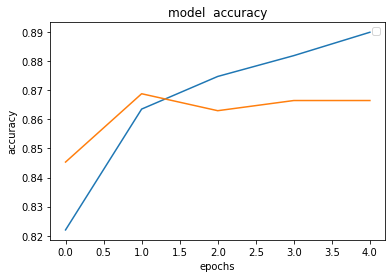

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


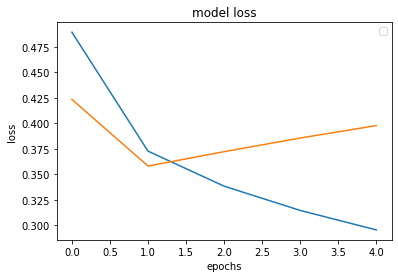

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcea4184f60>)

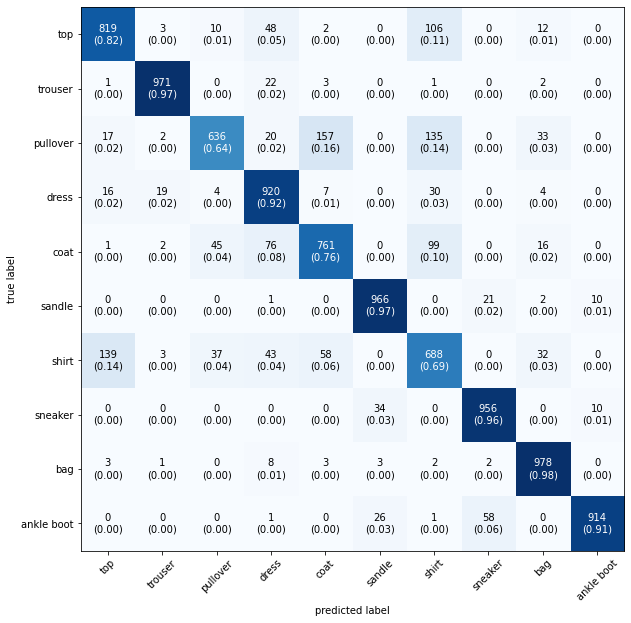

In [ ]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#print(x_train.shape)
#print(y_train.shape)
classes_names=['top','trouser','pullover','dress','coat','sandle','shirt','sneaker','bag','ankle boot']
print(x_test.shape)
#plt.figure()
#plt.imshow(x_train[0])
#plt.colorbar()
x_train=x_train/255
x_test=x_test/255

#print(y_train)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=10,validation_split=0.1)
prediction=model.predict_classes(x_test)
#p=model.predict(x_test)
#np.set_printoptions(suppress=True)
#print(x_test[234])
#print(prediction[234])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model  accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend('train','val')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend('train','val')
plt.show()
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,prediction)
plot_confusion_matrix(conf_mat=mat,figsize=(10,10),class_names=classes_names,show_normed=True)